# Schedule TPC-DS 1 Descriptor

This notebook contains work pertatining to pattern learning / identification for a database workload schedule. It contains descriptors of the available data through plot visualizations, so as to better understand which resource play a part into reflecting underlying workloads.

## Data Preprocessing

### Module Installation and Importing Libraries

In [7]:
# Module Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Configuration Cell

Tweak parametric changes from this cell to influence outcome of experiment. 
NB: This experiment demonstrates at time  step = 1 (1 minute in advance). Further down in experiment, other timestep results are also featured and evaluated.

In [8]:
tpcds='TPCDS1'

### Read data from file into Pandas Dataframes

In [9]:
# Root path
#root_dir = 'C:/Users/gabriel.sammut/University/Data_ICS5200/Schedule/' + tpcds
root_dir = 'D:/Projects/Datagenerated_ICS5200/Schedule/' + tpcds

# Open Data
rep_hist_sysmetric_summary_path = root_dir + '/rep_hist_sysmetric_summary.csv'

rep_hist_sysmetric_summary_df = pd.read_csv(rep_hist_sysmetric_summary_path)

def prettify_header(headers):
    """
    Cleans header list from unwated character strings
    """
    header_list = []
    [header_list.append(header.replace("(","").replace(")","").replace("'","").replace(",","")) for header in headers]
    return header_list

rep_hist_sysmetric_summary_headers = prettify_header(rep_hist_sysmetric_summary_df.columns.values)

# Replace original headers with a prettified version of the same column list
rep_hist_sysmetric_summary_df = pd.read_csv(rep_hist_sysmetric_summary_path, names=rep_hist_sysmetric_summary_headers)

rep_hist_sysmetric_summary_df.drop(rep_hist_sysmetric_summary_df.index[0],inplace=True)

print(rep_hist_sysmetric_summary_df.head())

  SNAP_ID        DBID INSTANCE_NUMBER           BEGIN_TIME  \
1   43414  2634225673               1  2018-11-16 17:33:06   
2   43414  2634225673               1  2018-11-16 17:33:06   
3   43414  2634225673               1  2018-11-16 17:33:06   
4   43414  2634225673               1  2018-11-16 17:33:06   
5   43414  2634225673               1  2018-11-16 17:33:06   

              END_TIME INTSIZE GROUP_ID METRIC_ID                METRIC_NAME  \
1  2018-11-16 17:34:06    6003        2      2000     Buffer Cache Hit Ratio   
2  2018-11-16 17:34:06    6003        2      2001         Memory Sorts Ratio   
3  2018-11-16 17:34:06    6003        2      2002  Redo Allocation Hit Ratio   
4  2018-11-16 17:34:06    6003        2      2003   User Transaction Per Sec   
5  2018-11-16 17:34:06    6003        2      2004     Physical Reads Per Sec   

                      METRIC_UNIT      ...         CON_DBID CON_ID  \
1   % (LogRead - PhyRead)/LogRead      ...       2634225673      0   
2  % M

# Dataset Description

All data sources are retrieved from Oracle defined tables/views. These sources have been specifically chosen because they accurately portray a database system under load, across a period of time. Such data sources were polled at regular intervals (60 seconds), and recorded into intermediatery tables for future data mining potential. Each statistic set corresponds to a 'SNAP_ID', which quantifies a particular resource usage at a point in time. 'SNAP_ID' delta equates to 60 seconds. In addition, relavent SQL access plans taken during the workloads execution were also captured.

Statistical calculations:
* Column Names
* Dataframe Row Counts
* Mean (were applicable)
* Standard Dev (were applicable)
* Quartile Percentile
* Min / Max

In [10]:
print('-----------------------------------------------------------')
print('Dataframe Row Count: REP_HIST_SYSMETRIC_SUMMARY - ' + str(len(rep_hist_sysmetric_summary_df)))
print('-----------------------------------------------------------\n')

print('\n\nREP_HIST_SYSMETRIC_SUMMARY:')
print(rep_hist_sysmetric_summary_df.describe())

-----------------------------------------------------------
Dataframe Row Count: REP_HIST_SYSMETRIC_SUMMARY - 3192770
-----------------------------------------------------------



REP_HIST_SYSMETRIC_SUMMARY:
        SNAP_ID        DBID  INSTANCE_NUMBER           BEGIN_TIME  \
count   3192770     3192770          3192770              3192770   
unique    19832           2                2                19831   
top       43581  2634225673                1  2018-11-24 22:18:07   
freq        161     3160003          3160003                  161   

                   END_TIME  INTSIZE  GROUP_ID  METRIC_ID  \
count               3192770  3192770   3192770    3192770   
unique                19831       30         2        322   
top     2018-11-24 22:18:07     6003         2       2121   
freq                    161  2089031   3160003      19628   

                      METRIC_NAME        METRIC_UNIT      ...       \
count                     3192770            3192770      ...        

# Dataset Extraction

The above datasets were extracted from the following user defined tables:
* REP_HIST_SYSMETRIC_SUMMARY

Each table corresponds to an Oracle defined table, whose sole function is to offload data from Oracle defined tables (which tend to have a retention period) into a user defined table. Table REP_HIST_SNAPSHOT, REP_HIST_SYSMETRIC_SUMMARY and REP_HIST_SYSSTAT can be joined through the 'SNAP_ID' column. Table REP_VSQL_PLAN can be joined to REP_HIST_SNAPSHOT through the 'SQL_ID' column.

For table REP_HIST_SYSMETRIC_SUMMARY, the Oracle history table DBA_HIST_SNAPSHOT (https://docs.oracle.com/cd/B19306_01/server.102/b14237/statviews_3177.htm#REFRN23442) was joined with DBA_HIST_SYSMETRIC_SUMMARY (https://docs.oracle.com/cd/E18283_01/server.112/e17110/statviews_4059.htm). This combination contains a history summary of past incurred metrics on the database instance, as well as the amount recorded per metric at a particular established snapshots. The specific query used can be found further below.

``` sql
/*REP_HIST_SYSMETRIC_SUMMARY*/
select dhss.*,
       dhsnap.startup_time,
       dhsnap.flush_elapsed,
       dhsnap.snap_level,
       dhsnap.error_count,
       dhsnap.snap_flag,
       dhsnap.snap_timezone
from DBA_HIST_SYSMETRIC_SUMMARY dhss,
     dba_hist_snapshot dhsnap
where dhss.snap_id = dhsnap.snap_id
and dhss.dbid = dhsnap.dbid
and dhss.instance_number = dhsnap.instance_number
and dhsnap.snap_id between '544' and '545';
```

# Data Visualization

The following section visualizes each dataset through a number of pictorial graphs, so as to better visualize the underlying load distribution.

## Table REP_HIST_SYSMETRIC_SUMMARY 

Plotting database snapshot resources over time

In [ ]:
class SnapShotVisualization:
    """
    This class is dedicatedto visualizing collected data over a period of snapshot identifiers.
    """
    def __init__(self, table=None, tpc_type=None, df=None):
        """
        Class constructor.
        :param table:    (String) Denotes which table is going to be utilized. Used for plot purposes.
        :param tpc_type: (String) Denotes which tpc type these experimental plots pertain to.
        :param df:       (Pandas) Data matrix.
        :return: None
        """
        self.__table = table
        self.__tpc_type = tpc_type
        self.__df = df
        
    def plot_snapshot_distribution(self, column):
        """
        Plots line graph, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        # Convert to float
        df['SNAP_ID'] = df['SNAP_ID'].astype(float)
        df[column]=df[column].astype(float)
        start_snap, end_snap = int(df['SNAP_ID'].min()), int(df['SNAP_ID'].max())

        # Sort by order of execute time
        df = df.sort_values(by=['SNAP_ID'])

        # Group by SNAP_ID
        df = df.groupby(['SNAP_ID'])[column].sum()

        fig, ax = plt.subplots()
        df.plot(kind='line', x='SNAP_ID', y=column, ax=ax)
        plt.ylabel(column)
        plt.xlabel('SNAP ID')
        plt.title(tpc_type + ' ' + str(column) + " between " + str(start_snap) + " - " + str(end_snap))
        plt.rcParams['figure.figsize'] = [20, 15]
        plt.show()

    def plot_snapshot_ratios(self, column):
        """
        Plots Pie Chart, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        df = df.groupby([column])[column].count()

        # Sort by operation counts
        series = pd.Series(df.values, index=df.index, name='series')
        series.plot.pie(figsize=(6, 6))
        #plt.xticks([])
        plt.ylabel(column)
        plt.title(tpc_type + ' ' + str(column) + ' Ratio')
        plt.rcParams['figure.figsize'] = [40, 30]
        plt.legend(bbox_to_anchor=(0.95,0.95))
        plt.show()
        
ssv = SnapShotVisualization(table='rep_hist_sysmetric_summary', 
                            tpc_type=tpcds, 
                            df=rep_hist_sysmetric_summary_df)
# Invocation
for header in rep_hist_sysmetric_summary_df.columns:
    ssv.plot_all_metric_units(column=header)

% (LOGREAD - PHYREAD)/LOGREAD
------------------------------------------------------------------
Buffer Cache Hit Ratio


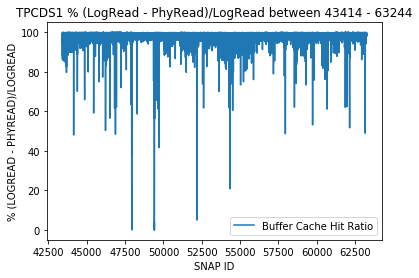

% MEMSORT/(MEMSORT + DISKSORT)
------------------------------------------------------------------
Memory Sorts Ratio


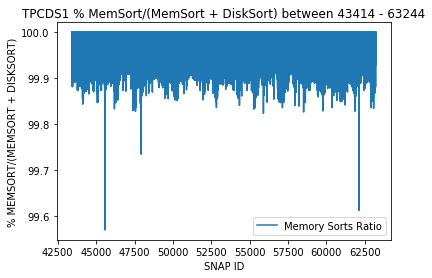

% (#REDO - REDOSPACEREQ)/#REDO
------------------------------------------------------------------
Redo Allocation Hit Ratio


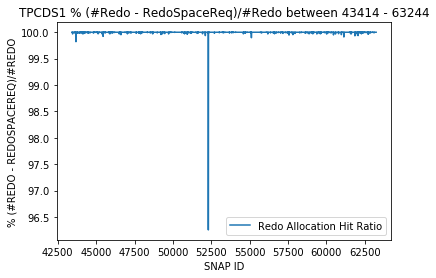

TRANSACTIONS PER SECOND
------------------------------------------------------------------
User Transaction Per Sec


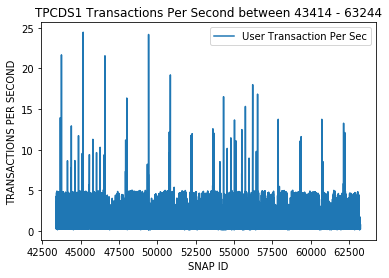

READS PER SECOND
------------------------------------------------------------------
Physical Reads Per Sec
Physical Reads Direct Per Sec
Physical Reads Direct Lobs Per Sec
Logical Reads Per Sec


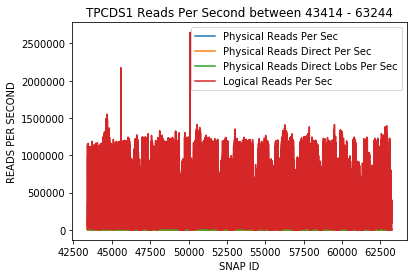

READS PER TXN
------------------------------------------------------------------
Physical Reads Per Txn
Physical Reads Direct Per Txn
Physical Reads Direct Lobs Per Txn
Logical Reads Per Txn


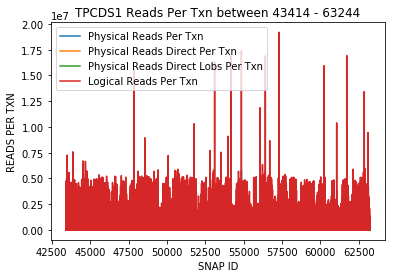

WRITES PER SECOND
------------------------------------------------------------------
Physical Writes Per Sec
Physical Writes Direct Per Sec
Physical Writes Direct Lobs Per Sec
Redo Writes Per Sec


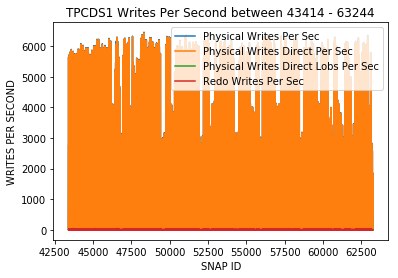

WRITES PER TXN
------------------------------------------------------------------
Physical Writes Per Txn
Physical Writes Direct Per Txn
Physical Writes Direct Lobs  Per Txn
Redo Writes Per Txn


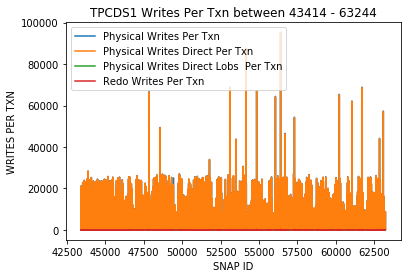

BYTES PER SECOND
------------------------------------------------------------------
Redo Generated Per Sec
Network Traffic Volume Per Sec
Physical Read Total Bytes Per Sec
Physical Write Total Bytes Per Sec
Physical Read Bytes Per Sec
Physical Write Bytes Per Sec


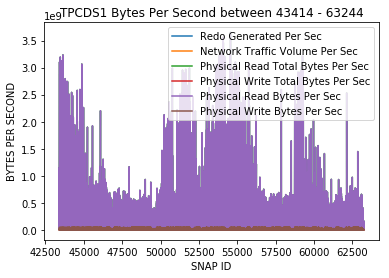

BYTES PER TXN
------------------------------------------------------------------
Redo Generated Per Txn


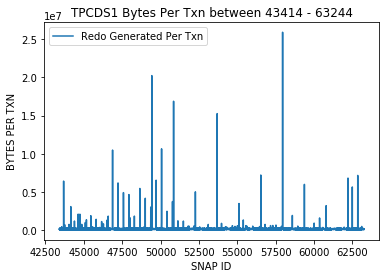

LOGONS PER SECOND
------------------------------------------------------------------
Logons Per Sec


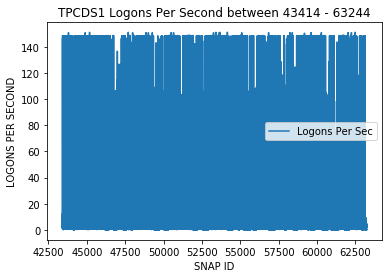

LOGONS PER TXN
------------------------------------------------------------------
Logons Per Txn


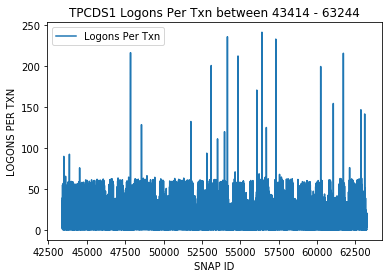

CURSORS PER SECOND
------------------------------------------------------------------
Open Cursors Per Sec


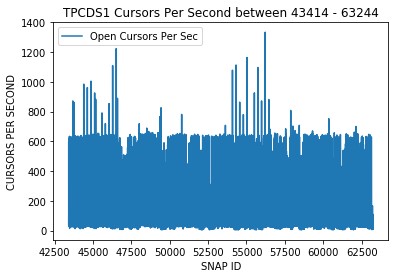

CURSORS PER TXN
------------------------------------------------------------------
Open Cursors Per Txn


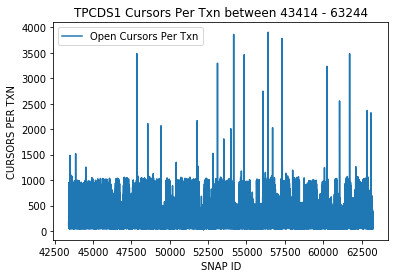

COMMITS PER SECOND
------------------------------------------------------------------
User Commits Per Sec


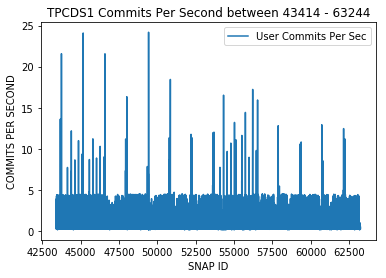

% (USERCOMMIT/TOTALUSERTXN)
------------------------------------------------------------------
User Commits Percentage


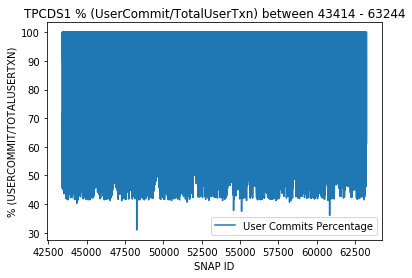

ROLLBACKS PER SECOND
------------------------------------------------------------------
User Rollbacks Per Sec


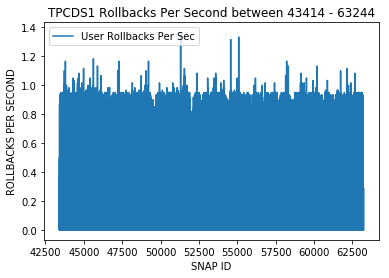

% (USERROLLBACK/TOTALUSERTXN)
------------------------------------------------------------------
User Rollbacks Percentage


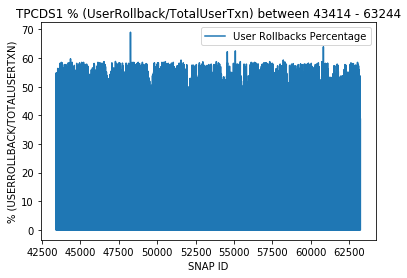

CALLS PER SECOND
------------------------------------------------------------------
User Calls Per Sec
Recursive Calls Per Sec


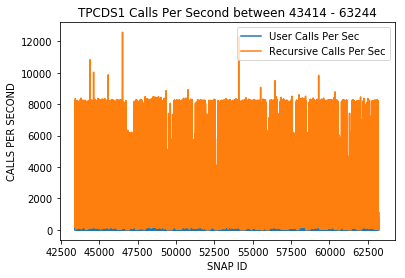

CALLS PER TXN
------------------------------------------------------------------
User Calls Per Txn
Recursive Calls Per Txn


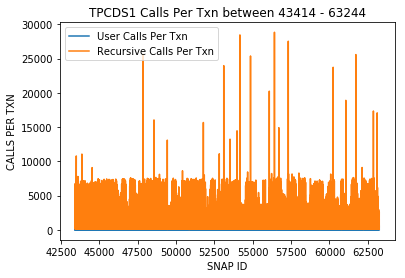

CHECK POINTS PER SECOND
------------------------------------------------------------------
DBWR Checkpoints Per Sec
Background Checkpoints Per Sec


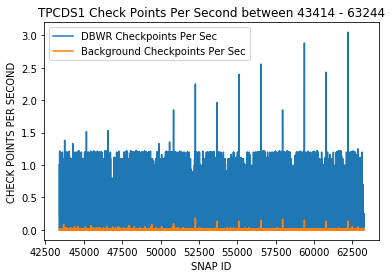

SCANS PER SECOND
------------------------------------------------------------------
Long Table Scans Per Sec
Total Table Scans Per Sec
Full Index Scans Per Sec
Total Index Scans Per Sec


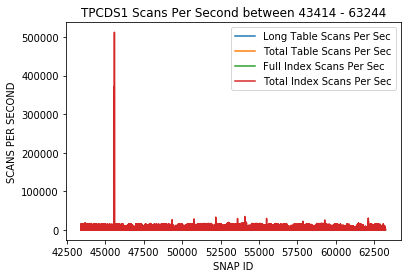

SCANS PER TXN
------------------------------------------------------------------
Long Table Scans Per Txn
Total Table Scans Per Txn
Full Index Scans Per Txn
Total Index Scans Per Txn


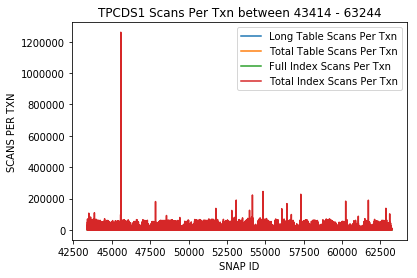

PARSES PER SECOND
------------------------------------------------------------------
Total Parse Count Per Sec
Hard Parse Count Per Sec
Parse Failure Count Per Sec


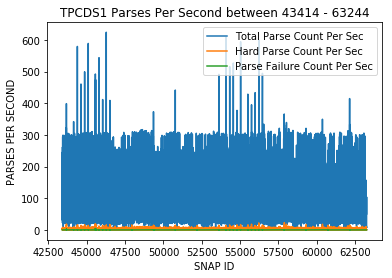

PARSES PER TXN
------------------------------------------------------------------
Total Parse Count Per Txn
Hard Parse Count Per Txn
Parse Failure Count Per Txn


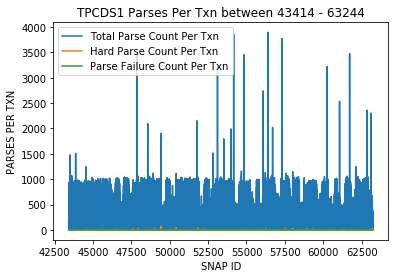

% CURSORCACHEHIT/SOFTPARSE
------------------------------------------------------------------
Cursor Cache Hit Ratio


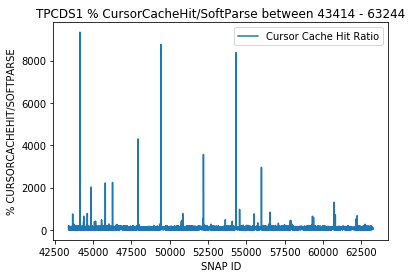

SORTS PER SECOND
------------------------------------------------------------------
Disk Sort Per Sec


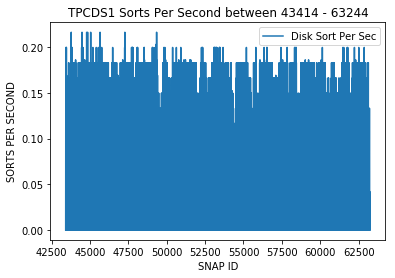

SORTS PER TXN
------------------------------------------------------------------
Disk Sort Per Txn


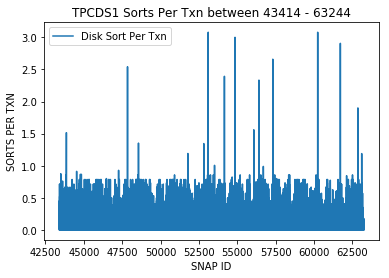

ROWS PER SORT
------------------------------------------------------------------
Rows Per Sort


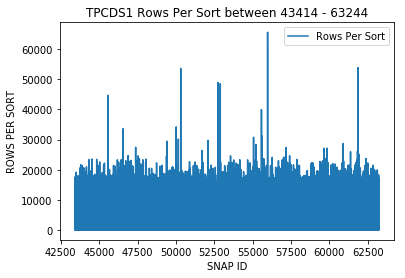

% (EXECWOPARSE/TOTALEXEC)
------------------------------------------------------------------
Execute Without Parse Ratio


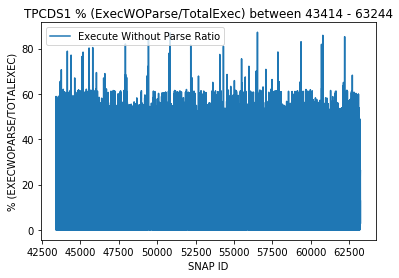

% SOFTPARSES/TOTALPARSES
------------------------------------------------------------------
Soft Parse Ratio


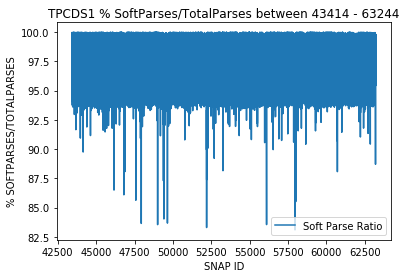

% USERCALLS/ALLCALLS
------------------------------------------------------------------
User Calls Ratio


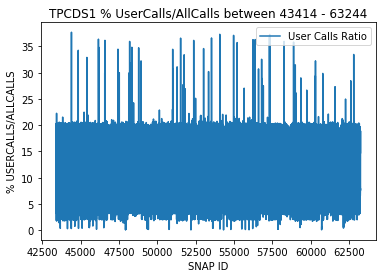

% BUSY/(IDLE+BUSY)
------------------------------------------------------------------
Host CPU Utilization (%)


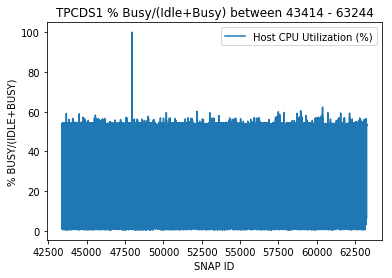

TIMEOUTS PER SECOND
------------------------------------------------------------------
Enqueue Timeouts Per Sec


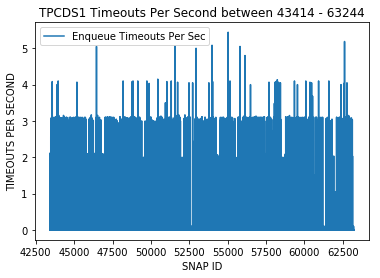

TIMEOUTS PER TXN
------------------------------------------------------------------
Enqueue Timeouts Per Txn


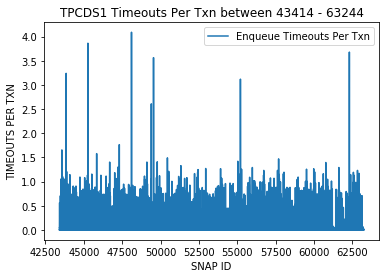

WAITS PER SECOND
------------------------------------------------------------------
Enqueue Waits Per Sec


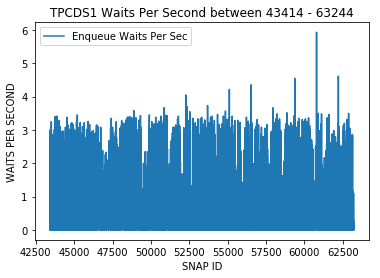

WAITS PER TXN
------------------------------------------------------------------
Enqueue Waits Per Txn


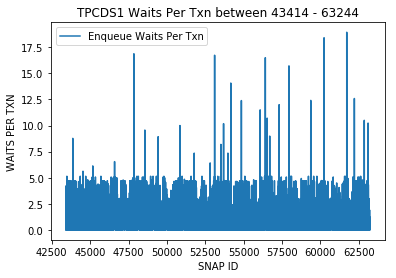

DEADLOCKS PER SECOND
------------------------------------------------------------------
Enqueue Deadlocks Per Sec


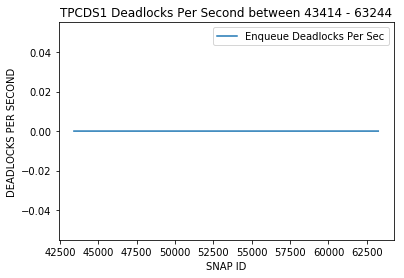

DEADLOCKS PER TXN
------------------------------------------------------------------
Enqueue Deadlocks Per Txn


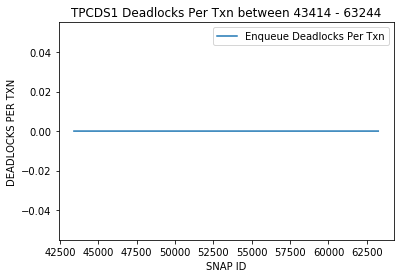

REQUESTS PER SECOND
------------------------------------------------------------------
Enqueue Requests Per Sec
Physical Read Total IO Requests Per Sec
Physical Write Total IO Requests Per Sec
Physical Read IO Requests Per Sec
Physical Write IO Requests Per Sec


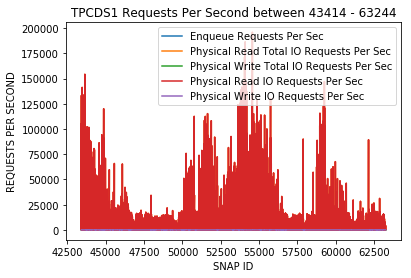

REQUESTS PER TXN
------------------------------------------------------------------
Enqueue Requests Per Txn


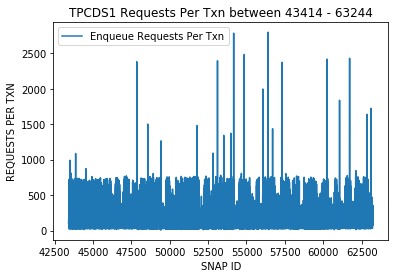

BLOCKS PER SECOND
------------------------------------------------------------------
DB Block Gets Per Sec
Consistent Read Gets Per Sec
DB Block Changes Per Sec
Consistent Read Changes Per Sec
CR Blocks Created Per Sec
GC CR Block Received Per Second
GC Current Block Received Per Second


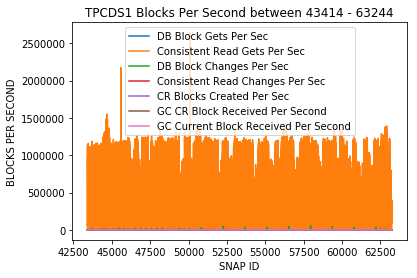

BLOCKS PER TXN
------------------------------------------------------------------
DB Block Gets Per Txn
Consistent Read Gets Per Txn
DB Block Changes Per Txn
Consistent Read Changes Per Txn
CR Blocks Created Per Txn
GC CR Block Received Per Txn
GC Current Block Received Per Txn


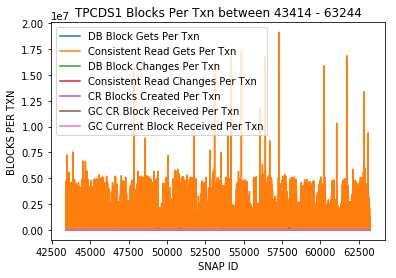

CENTISECONDS PER SECOND
------------------------------------------------------------------
CPU Usage Per Sec
Database Time Per Sec
Background CPU Usage Per Sec
Host CPU Usage Per Sec


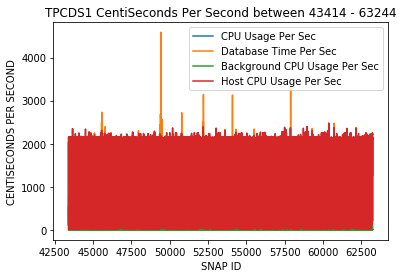

CENTISECONDS PER TXN
------------------------------------------------------------------
CPU Usage Per Txn
Response Time Per Txn


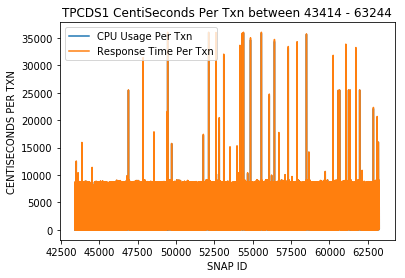

UNDO RECORDS PER SECOND
------------------------------------------------------------------
CR Undo Records Applied Per Sec


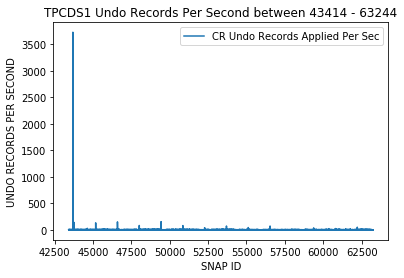

RECORDS PER TXN
------------------------------------------------------------------
CR Undo Records Applied Per Txn
User Rollback Undo Records Applied Per Txn


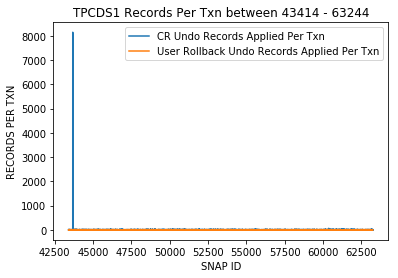

RECORDS PER SECOND
------------------------------------------------------------------
User Rollback UndoRec Applied Per Sec


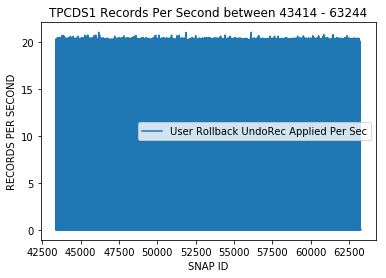

SPLITS PER SECOND
------------------------------------------------------------------
Leaf Node Splits Per Sec
Branch Node Splits Per Sec


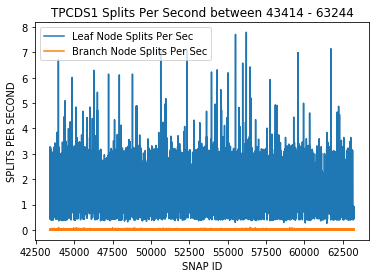

SPLITS PER TXN
------------------------------------------------------------------
Leaf Node Splits Per Txn
Branch Node Splits Per Txn


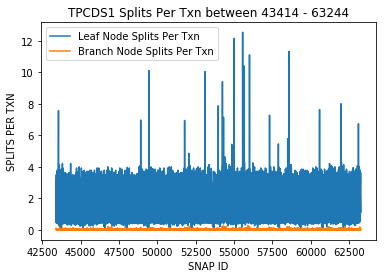

PX OPERATIONS PER SECOND
------------------------------------------------------------------
PX downgraded 1 to 25% Per Sec
PX downgraded 25 to 50% Per Sec
PX downgraded 50 to 75% Per Sec
PX downgraded 75 to 99% Per Sec
PX downgraded to serial Per Sec
PX operations not downgraded Per Sec


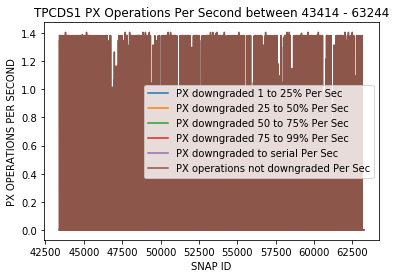

CENTISECONDS PER GET
------------------------------------------------------------------
Global Cache Average CR Get Time
Global Cache Average Current Get Time


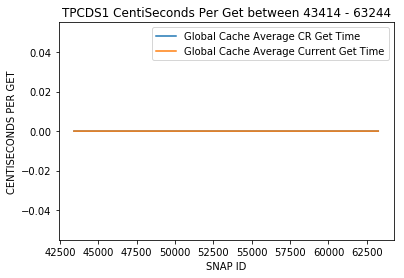

BLOCKS
------------------------------------------------------------------
Global Cache Blocks Corrupted
Global Cache Blocks Lost


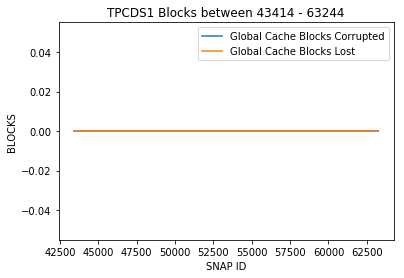

LOGONS
------------------------------------------------------------------
Current Logons Count


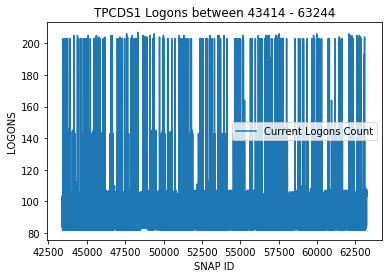

CURSORS
------------------------------------------------------------------
Current Open Cursors Count


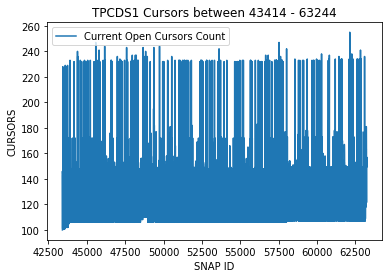

% SESSIONS/LICENSE_LIMIT
------------------------------------------------------------------
User Limit %


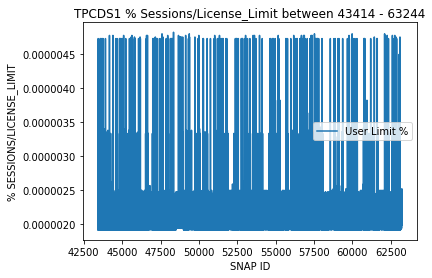

CENTISECONDS PER CALL
------------------------------------------------------------------
SQL Service Response Time


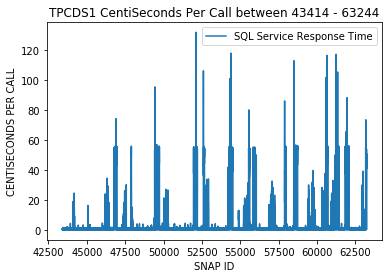

% WAIT/DB_TIME
------------------------------------------------------------------
Database Wait Time Ratio


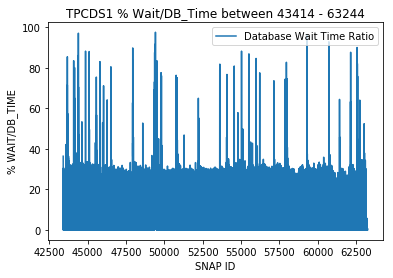

% CPU/DB_TIME
------------------------------------------------------------------
Database CPU Time Ratio


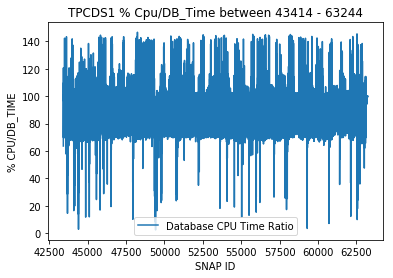

% HITS/GETS
------------------------------------------------------------------
Row Cache Hit Ratio


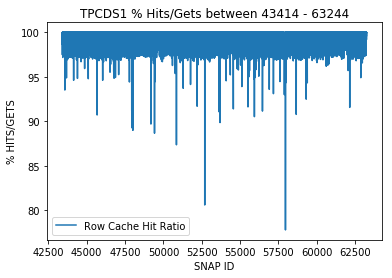

% MISSES/GETS
------------------------------------------------------------------
Row Cache Miss Ratio
Library Cache Miss Ratio


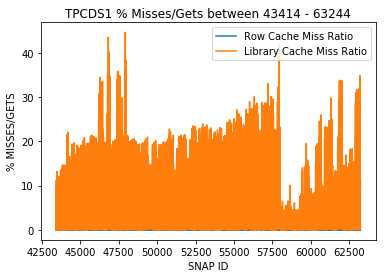

% HITS/PINS
------------------------------------------------------------------
Library Cache Hit Ratio


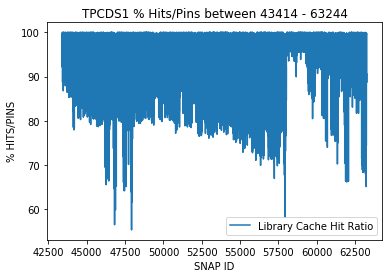

% FREE/TOTAL
------------------------------------------------------------------
Shared Pool Free %


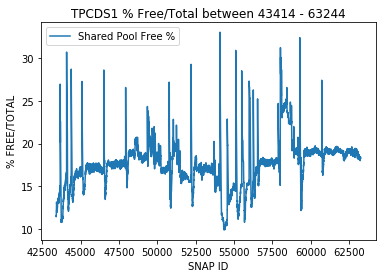

% BYTES/TOTALBYTES
------------------------------------------------------------------
PGA Cache Hit %


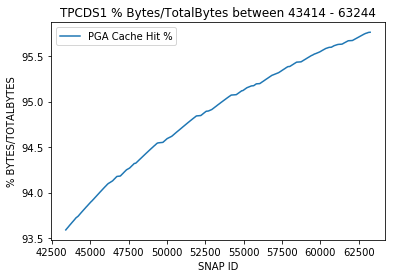

% PROCESSES/LIMIT
------------------------------------------------------------------
Process Limit %


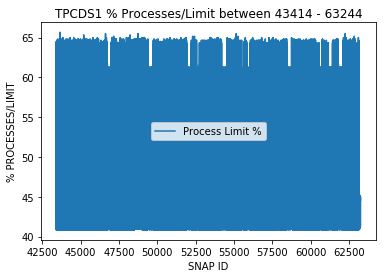

% SESSIONS/LIMIT
------------------------------------------------------------------
Session Limit %


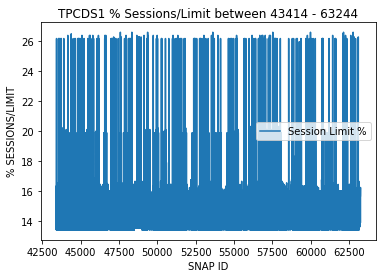

EXECUTES PER TXN
------------------------------------------------------------------
Executions Per Txn


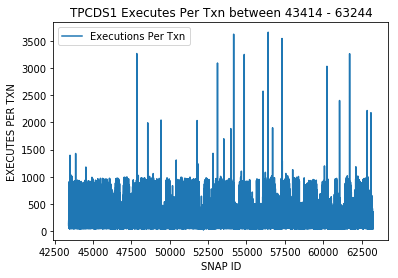

EXECUTES PER SECOND
------------------------------------------------------------------
Executions Per Sec


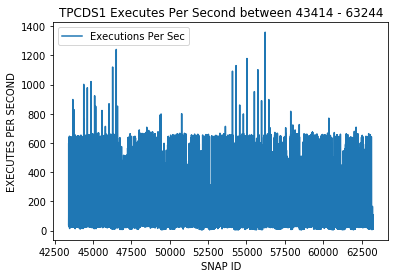

TXNS PER LOGON
------------------------------------------------------------------
Txns Per Logon


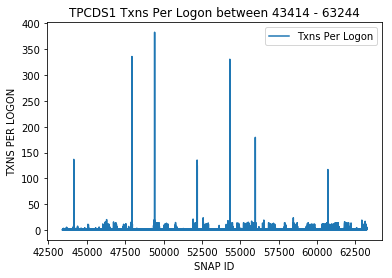

BLOCKS PER CALL
------------------------------------------------------------------
DB Block Changes Per User Call
DB Block Gets Per User Call


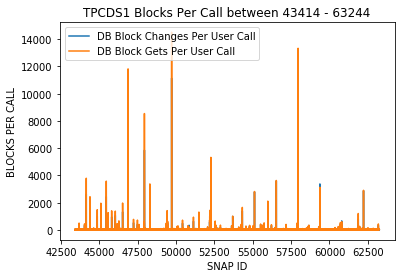

EXECUTES PER CALL
------------------------------------------------------------------
Executions Per User Call


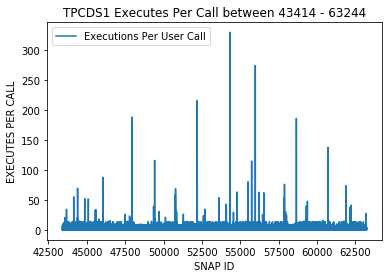

READS PER CALL
------------------------------------------------------------------
Logical Reads Per User Call


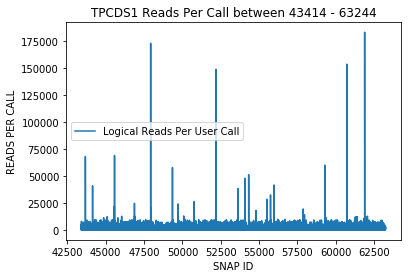

SORTS PER CALL
------------------------------------------------------------------
Total Sorts Per User Call


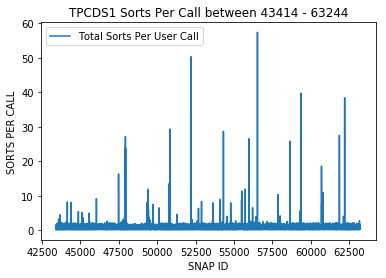

TABLES PER CALL
------------------------------------------------------------------
Total Table Scans Per User Call


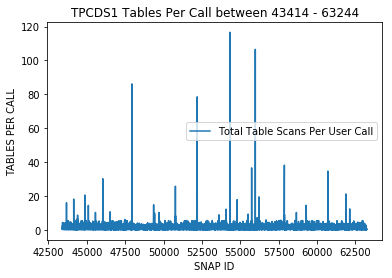

NUMBER OF PROCESSES
------------------------------------------------------------------
Current OS Load


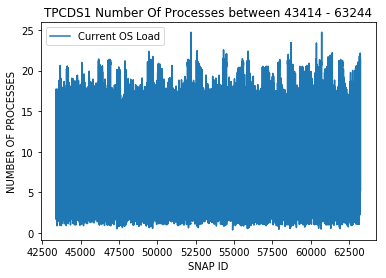

% MEMORY ALLOCATED / SIZE OF STREAMS POOL
------------------------------------------------------------------
Streams Pool Usage Percentage


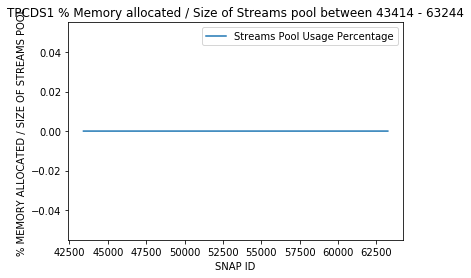

SESSIONS
------------------------------------------------------------------
PQ QC Session Count
PQ Slave Session Count
Session Count
Active Serial Sessions
Active Parallel Sessions


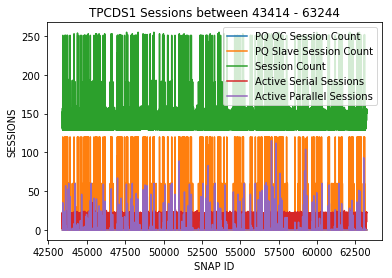

QUERIES PER SECOND
------------------------------------------------------------------
Queries parallelized Per Sec


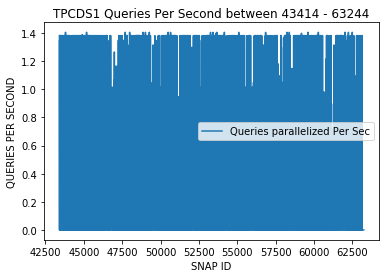

STATEMENTS PER SECOND
------------------------------------------------------------------
DML statements parallelized Per Sec
DDL statements parallelized Per Sec


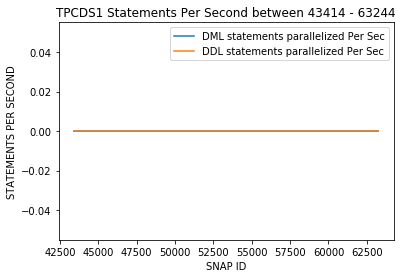

MILLISECONDS
------------------------------------------------------------------
Average Synchronous Single-Block Read Latency


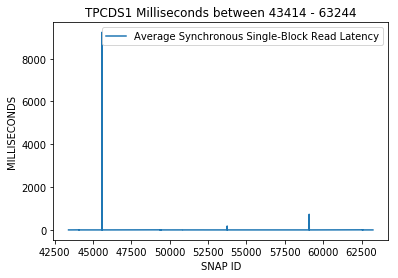